In [1]:
import numpy as np
import matplotlib.pyplot as plt
n_order =3
t = np.linspace(0,10,100)
signal = np.sin(t)


plt.plot(t,signal)
plt.show()
m = len(signal)
X = np.linspace(-1,1,m) # Legendre polynomial are supported for |x| <=1


<Figure size 640x480 with 1 Axes>

In [2]:
n_order = 20
if n_order > 1:
        coeff = np.zeros((n_order+1,n_order+1))
        coeff[0,0] = 1 #set coef of P_0(x) to 1
        coeff[1,1] = 1 #set coef of P_1(x) to 1
        for ii in np.arange(2,n_order+1):
                    # P{n}(x) = (2-1/n)xP_{n-1}(x) - (1-1/n)*P_{n-2}(x)
                    # =   (2-1/ii)* coeff[ii-1,last_indx then zero to index before last] --> because mulitply of x  - (1-1/ii)* coeff[ii-2,:]
            coeff[ii,:] = (2-1/ii)*np.concatenate([np.array(coeff[ii-1,-1]).reshape(1,),coeff[ii-1,:-1]]).reshape(1,-1) - (1-1/ii)*coeff[ii-2,:]
else:
    coeff = np.eye(n_order+1)

In [3]:
a = np.ones((m,1))
b = np.repeat(X.reshape(-1,1),n_order,axis=1)
s = np.concatenate((a,b),axis=1)
D = np.dot(np.cumprod(s,axis=1),coeff.T)

#A = np.dot(D.T,D)/(np.dot(D.T,signal.reshape(-1,1)))
A = np.dot(np.linalg.inv(np.dot(D.T,D)),np.dot(D.T,signal))


In [4]:
A.shape

(21,)

In [5]:
A

array([ 1.83907153e-01, -8.09198079e-02,  6.45985140e-01, -4.56339932e-01,
       -1.61402193e+00,  3.33281162e-01,  5.97956121e-01, -7.61751178e-02,
       -9.35952184e-02,  8.72088033e-03,  8.20285796e-03, -6.05096979e-04,
       -4.62390012e-04,  2.82858265e-05,  1.82274009e-05, -9.53463811e-07,
       -5.31608256e-07,  2.43053409e-08,  1.19479986e-08, -4.84402441e-10,
       -2.13108448e-10])

In [6]:
A

array([ 1.83907153e-01, -8.09198079e-02,  6.45985140e-01, -4.56339932e-01,
       -1.61402193e+00,  3.33281162e-01,  5.97956121e-01, -7.61751178e-02,
       -9.35952184e-02,  8.72088033e-03,  8.20285796e-03, -6.05096979e-04,
       -4.62390012e-04,  2.82858265e-05,  1.82274009e-05, -9.53463811e-07,
       -5.31608256e-07,  2.43053409e-08,  1.19479986e-08, -4.84402441e-10,
       -2.13108448e-10])

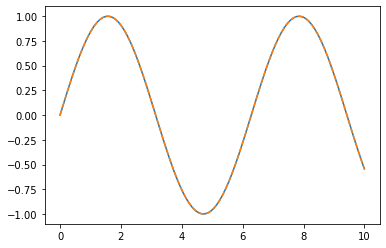

In [10]:
plt.plot(t,np.dot(D,A))
plt.plot(t,signal,'--')